<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:80px;
            text-align: center;
            padding-top: 10px;"> <h1 style="color: white;">MonkeyPox Data Analysis</h1> </div>

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height: 60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Importing libreries</h2> </div>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Getting data</h2> </div>

In [3]:
casesCountry_dataset = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv").rename(columns={'Country':'Date'}).set_index('Date')
casesCountry_dataset.head(5)

2022-01-31  2022-02-17  2022-02-28  2022-03-04  \
Date                                                                       
Nigeria                            3           0           1           0   
Cameroon                           0           3           0           0   
Central African Republic           0           0           0           2   
Republic of Congo                  0           0           0           0   
England                            0           0           0           0   

                          2022-03-31  2022-04-10  2022-04-12  2022-04-30  \
Date                                                                       
Nigeria                            6           0           0           5   
Cameroon                           0           0           0           0   
Central African Republic           0           4           0           0   
Republic of Congo                  0           0           2           0   
England                            0           0           0           0   

                          2022-05-06  2022-05-08  ...  2022-08-03  2022-08-04  \
Date                                              ...                           
Nigeria                            0           0  ...           0           0   
Cameroon                           0           0  ...           0           0   
Central African Republic           0           0  ...           0           0   
Republic of Congo                  0           0  ...           0           0   
England                            1           0  ...           0          92   

                          2022-08-05  2022-08-06  2022-08-07  2022-08-08  \
Date                                                                       
Nigeria                            0           0           0           0   
Cameroon                           0           0           0           0   
Central African Republic           0           0           0           0   
Republic of Congo                  0           0           0           0   
England                            0           0           0         153   

                          2022-08-09  2022-08-10  2022-08-11  2022-08-12  
Date                                                                      
Nigeria                            0           0           0           0  
Cameroon                           0           0           0           0  
Central African Republic           0           0           0           0  
Republic of Congo                  0           0           0           0  
England                            0           0           0           0  

[5 rows x 100 columns]

In [4]:
informationCountries_dataset = pd.read_csv("countries of the world.csv", decimal=',')
informationCountries_dataset.head(5)

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Data exploration</h2> </div>

In [5]:
palette = ["#00278f", "#063fae", "#0858ce", "#0572ee", "#448eff", "#76adff", "#9acdff", "#b8eeff"]

In [6]:
casesCountry_dataset = casesCountry_dataset.transpose()

In [7]:
casesCountry_dataset.describe().T

count   mean        std  min  25%  50%    75%    max
Date                                                                          
Nigeria                   100.0   1.57   4.649872  0.0  0.0  0.0   0.00   24.0
Cameroon                  100.0   0.07   0.432400  0.0  0.0  0.0   0.00    3.0
Central African Republic  100.0   0.08   0.485757  0.0  0.0  0.0   0.00    4.0
Republic of Congo         100.0   0.03   0.222702  0.0  0.0  0.0   0.00    2.0
England                   100.0  28.83  61.767576  0.0  0.0  0.0  14.25  275.0
...                         ...    ...        ...  ...  ...  ...    ...    ...
Cyprus                    100.0   0.03   0.222702  0.0  0.0  0.0   0.00    2.0
Lithuania                 100.0   0.05   0.297294  0.0  0.0  0.0   0.00    2.0
Guatemala                 100.0   0.03   0.171447  0.0  0.0  0.0   0.00    1.0
Moldova                   100.0   0.01   0.100000  0.0  0.0  0.0   0.00    1.0
Greenland                 100.0   0.02   0.200000  0.0  0.0  0.0   0.00    2.0

[93 rows x 8 columns]

In [8]:
#Elimina espacios en blanco al inicio y final de los nombres de los países
for i in range(0, len(informationCountries_dataset['Country'])):
    informationCountries_dataset['Country'][i] = informationCountries_dataset['Country'][i].strip()

In [9]:
informationCountries_dataset = informationCountries_dataset[informationCountries_dataset['Country'].isin(casesCountry_dataset.keys().values)]

In [10]:
final_dataset = informationCountries_dataset[['Country', 'Region', 'Population','Pop. Density (per sq. mi.)']]
final_dataset.shape

(82, 4)

In [11]:
temp = pd.DataFrame()
temp['Country'] = casesCountry_dataset.sum().index
temp['Cases'] = casesCountry_dataset.sum().values
temp = temp.sort_values(by='Country', ascending=True)
temp = temp[temp['Country'].isin(final_dataset['Country'])]
final_dataset['Cases'] = (temp[temp['Country'].isin(final_dataset['Country'])])['Cases'].values
final_dataset

Country                               Region  Population  \
4                 Andorra  WESTERN EUROPE                            71201   
8               Argentina              LATIN AMER. & CARIB        39921833   
11              Australia  OCEANIA                                20264082   
12                Austria  WESTERN EUROPE                          8192880   
17               Barbados              LATIN AMER. & CARIB          279912   
..                    ...                                  ...         ...   
206                Turkey  NEAR EAST                              70413958   
212  United Arab Emirates  NEAR EAST                               2602713   
214         United States  NORTHERN AMERICA                      298444215   
215               Uruguay              LATIN AMER. & CARIB         3431932   
218             Venezuela              LATIN AMER. & CARIB        25730435   

     Pop. Density (per sq. mi.)  Cases  
4                         152.1      4  
8                          14.4     49  
11                          2.6     71  
12                         97.7    198  
17                        649.5      1  
..                          ...    ...  
206                        90.2      5  
212                        31.4     16  
214                        31.0  11130  
215                        19.5      2  
218                        28.2      1  

[82 rows x 5 columns]

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Total cases by country</h2> </div>

### Top 5 countries with the most cases

In [12]:
toGraph = final_dataset.sort_values(by='Cases', ascending=False)[:8]

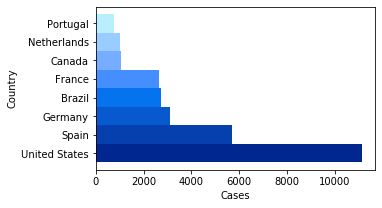

In [13]:
plt.figure(figsize=(5, 3))
plt.barh(toGraph['Country'], toGraph['Cases'], color=palette, height=1)
plt.xlabel('Cases')
plt.ylabel('Country')
plt.show()

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Case graphs by country</h2> </div>

### Cumulative frequency

<function matplotlib.pyplot.show(*args, **kw)>

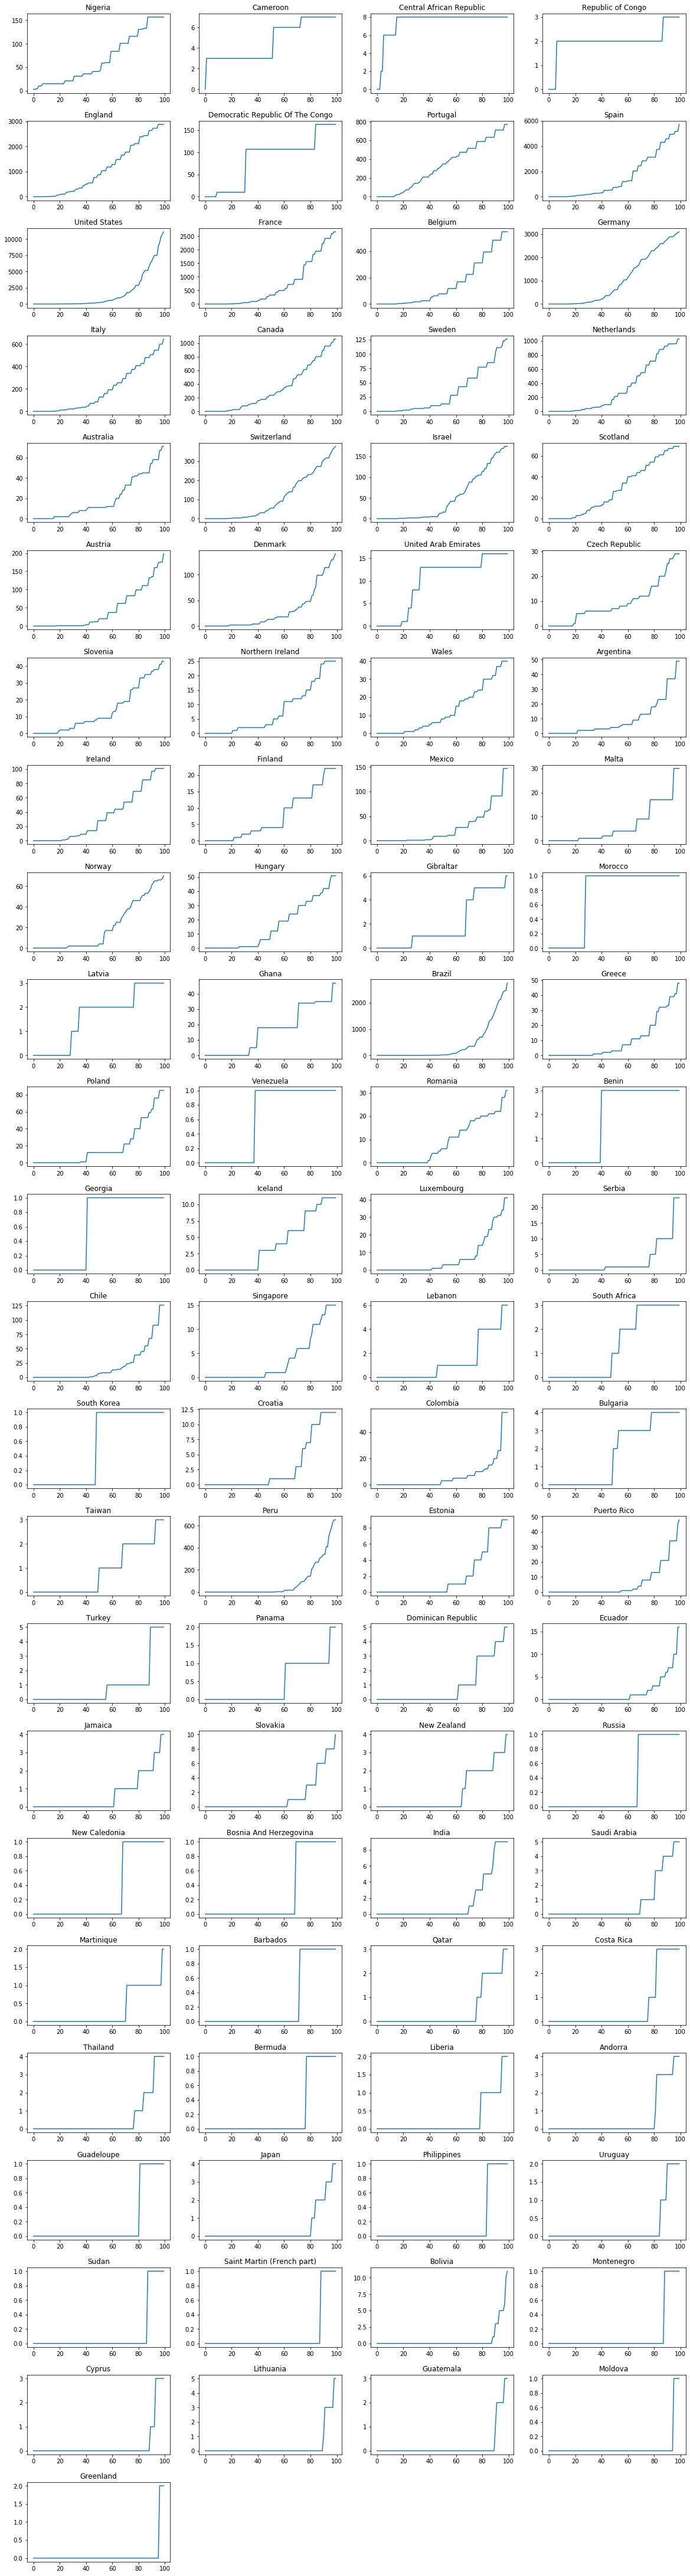

In [14]:
plt.figure(figsize=(20,75))
for j in range(0, len(casesCountry_dataset.columns.values)):
    temp = 0
    X = []
    Y = []
    for i in range(0, len(casesCountry_dataset.iloc[:,j])):
        Y.append(i)
        X.append(temp + casesCountry_dataset.iloc[:,j][i])
        temp = X[i]
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(casesCountry_dataset.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

### Absolute frequency

<function matplotlib.pyplot.show(*args, **kw)>

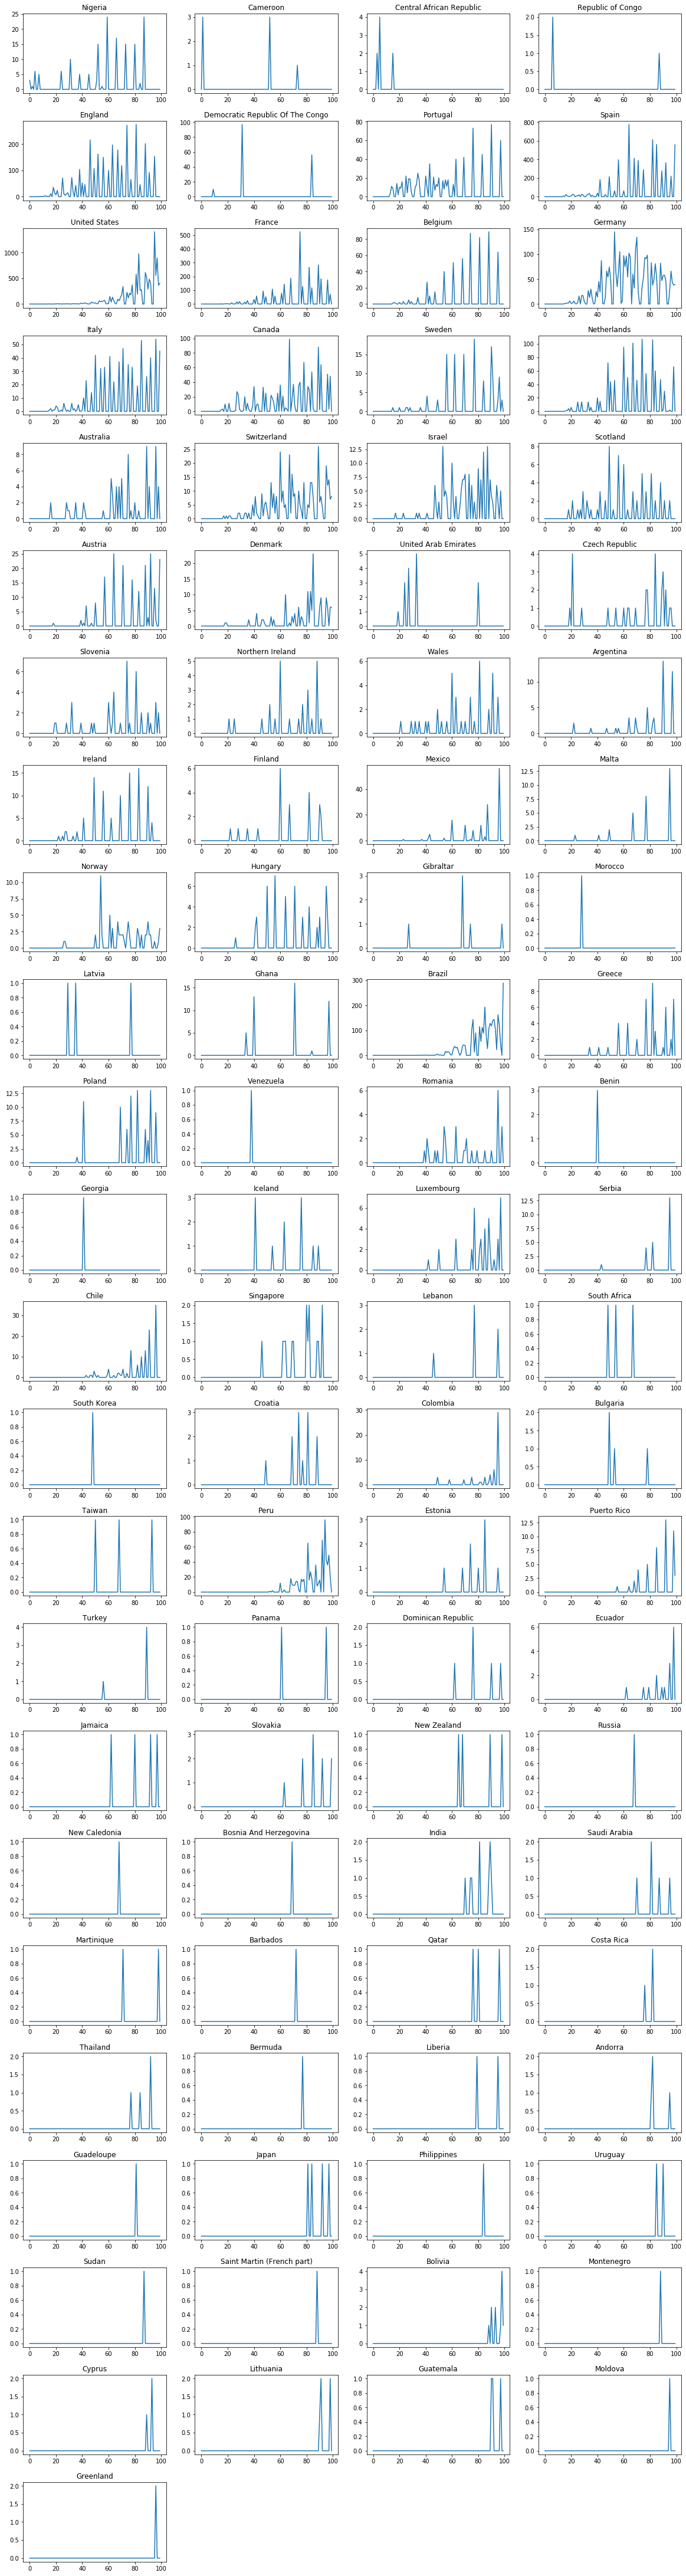

In [15]:
plt.figure(figsize=(20,75))
for j in range(0, len(casesCountry_dataset.columns.values)):
    X = []
    Y = []
    for i in range(0, len(casesCountry_dataset.iloc[:,j])):
        Y.append(i)
        X.append(casesCountry_dataset.iloc[:,j][i])
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(casesCountry_dataset.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Global cases graph</h2> </div>

<function matplotlib.pyplot.show(*args, **kw)>

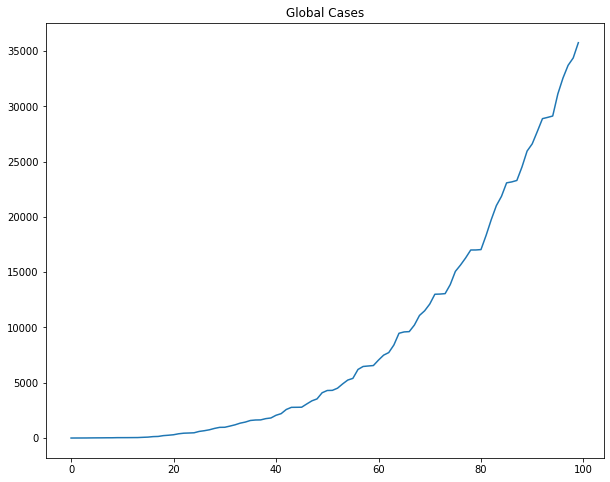

In [16]:
plt.figure(figsize=(10,8))

temp = 0
X = []
Y = []
for i in range(0, len(casesCountry_dataset.iloc[:,0])):
    for j in range(0, len(casesCountry_dataset.columns.values)):
        temp = temp + casesCountry_dataset.iloc[:,j][i]
    Y.append(i)
    X.append(temp)

globalCasesData = pd.DataFrame()
globalCasesData['day'] = Y
globalCasesData['cases'] = X
plt.plot(Y,X)
plt.title("Global Cases")

plt.show

In [17]:
palette.reverse()

In [18]:
#Tomado de https://www.kaggle.com/code/amiragk/monkeypox-analysis-a1222b
fig = px.choropleth(data_frame = final_dataset,
                    locations="Country", locationmode="country names", color="Cases",
                    color_continuous_scale=palette,height= 500,scope="world",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases",
                         "y":0.9,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

In [19]:
encoder = preprocessing.LabelEncoder()
encodedFinal_dataset = final_dataset[['Region','Population','Pop. Density (per sq. mi.)', 'Cases']]
encodedFinal_dataset['Region'] = encoder.fit_transform(encodedFinal_dataset['Region'].values)

In [20]:
#encodedFinal_dataset['Pop. Density (per sq. mi.)'] = encodedFinal_dataset['Pop. Density (per sq. mi.)'].astype(float)

In [21]:
scaler = StandardScaler()
scaler.fit(encodedFinal_dataset)
standard_data = scaler.transform(encodedFinal_dataset)

In [22]:
standard_dataframe = pd.DataFrame()
standard_dataframe['Region'] = standard_data[:,0]
standard_dataframe['Population'] = standard_data[:,1]
standard_dataframe['Pop. Density (per sq. mi.)'] = standard_data[:,2]
standard_dataframe['Cases'] = standard_data[:,3]

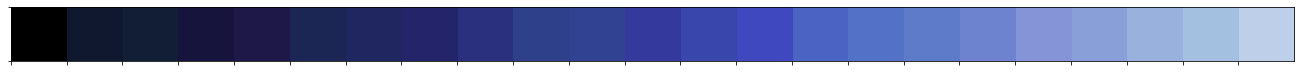

In [23]:
palette_cmap = ["#000000","#0F182E","#121D36","#16143D","#1E1849","#1C2654","#202660","#24246B","#2A307E","#2E408A","#304291","#343A9D","#3947AC","#4048BF","#4B63C3","#5371C6","#5E7BC9","#6E83CF","#8594D6","#88A0D7","#98B2DD","#A3C0E0","#BECFE9"]

sns.palplot(sns.color_palette(palette_cmap))
plt.show()

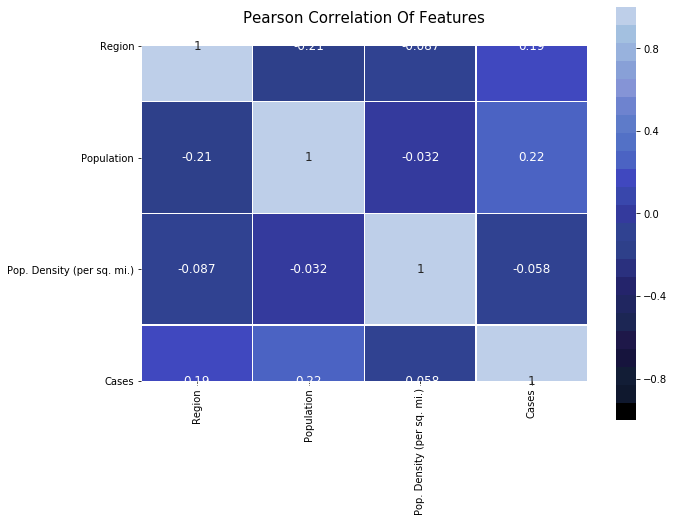

In [24]:
plt.subplots(figsize =(10, 8))

sns.heatmap(standard_dataframe.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.95), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Visualizing the dataset
#plt.scatter(standard_dataframe['Population'], standard_dataframe['Cases'], c=palette_cmap[9])
#plt.xlabel('Population')
#plt.ylabel('Cases')
#plt.show()

In [26]:
X = standard_dataframe.iloc[:, [0, 3]].values

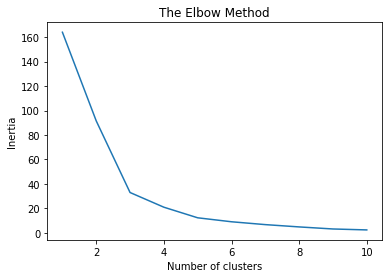

In [27]:
# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [29]:
kmeans.cluster_centers_

array([[ 1.09126099, -0.03081855],
       [-0.76272914, -0.21029405],
       [ 0.84532353,  5.5401541 ]])

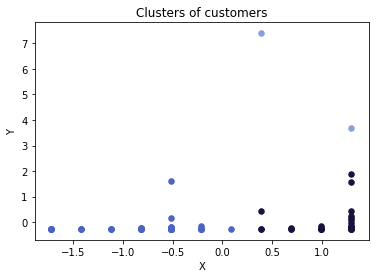

In [30]:
# Visualizing the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = palette_cmap[3], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = palette_cmap[14], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = palette_cmap[19], label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
final_dataset['Clasification'] = y_kmeans
final_dataset.sort_values(by='Cases', ascending=False)[:8]

Country                               Region  Population  \
214  United States  NORTHERN AMERICA                      298444215   
190          Spain  WESTERN EUROPE                         40397842   
76         Germany  WESTERN EUROPE                         82422299   
27          Brazil              LATIN AMER. & CARIB       188078227   
69          France  WESTERN EUROPE                         60876136   
36          Canada  NORTHERN AMERICA                       33098932   
146    Netherlands  WESTERN EUROPE                         16491461   
164       Portugal  WESTERN EUROPE                         10605870   

     Pop. Density (per sq. mi.)  Cases  Clasification  
214                        31.0  11130              2  
190                        80.0   5719              2  
76                        230.9   3102              0  
27                         22.1   2747              1  
69                        111.3   2659              0  
36                          3.3   1058              0  
146                       397.1   1025              0  
164                       114.8    770              0

In [32]:
scaler = StandardScaler()
scaler.fit(globalCasesData)
sca = scaler.transform(globalCasesData)

In [33]:
globalCasesData['day'] = sca[:, 0]
globalCasesData['cases'] = sca[:, 1]

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Linear Regression</h2> </div>

In [34]:
#creating model
y = globalCasesData[['day']].values.astype(np.float32)
x = globalCasesData[['cases']].values.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
lr = LinearRegression(fit_intercept=False)

#We train with _train
lr_fit = lr.fit(x_train, y_train)

In [44]:
from sklearn.model_selection import KFold
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(x):
    x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
    lr = LinearRegression(fit_intercept=False)

    #We train with _train
    lr_fit = lr.fit(x_train, y_train)
    
    lr_score = lr_fit.score(x_test, y_test)
    print('Score of linear model for MonkeyPox Cases data set',lr_score)

Score of linear model for MonkeyPox Cases data set 0.7932505724687394
Score of linear model for MonkeyPox Cases data set 0.8209422053398575
Score of linear model for MonkeyPox Cases data set 0.758096499299102


In [51]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
kfold = KFold(5, True, 1)

# enumerate splits
for d in range(2,15):
    print('Degree ',d)
    for train, test in kfold.split(x):
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        poly = PolynomialFeatures(degree=d, include_bias=False)
        
        
        x_train_reshaped = poly.fit_transform(x_train.reshape(-1, 1))
        x_test_reshaped = poly.fit_transform(x_test.reshape(-1, 1))
        
        
        lr = LinearRegression(fit_intercept=False)
        ls = linear_model.Lasso(alpha=0.1)

        #We train with _train
        lr_fit = lr.fit(x_train_reshaped, y_train)
        ls_fit = ls.fit(x_train_reshaped, y_train)

        lr_score = lr_fit.score(x_test_reshaped, y_test)
        ls_score = ls_fit.score(x_test_reshaped, y_test)
        
        print('Score of linear model for MonkeyPox Cases data set',lr_score)
        print('Score of lasso model for MonkeyPox Cases data set',ls_score)

Degree  2
Score of linear model for MonkeyPox Cases data set 0.8334199026230008
Score of lasso model for MonkeyPox Cases data set 0.8970420265102261
Score of linear model for MonkeyPox Cases data set 0.8441132228018166
Score of lasso model for MonkeyPox Cases data set 0.8904764468322669
Score of linear model for MonkeyPox Cases data set 0.8654411953303093
Score of lasso model for MonkeyPox Cases data set 0.8719281006583646
Score of linear model for MonkeyPox Cases data set 0.8572072594990178
Score of lasso model for MonkeyPox Cases data set 0.8226303311146713
Score of linear model for MonkeyPox Cases data set 0.850440012054505
Score of lasso model for MonkeyPox Cases data set 0.6927888607990981
Degree  3
Score of linear model for MonkeyPox Cases data set 0.8319604739702178
Score of lasso model for MonkeyPox Cases data set 0.8970420265102261
Score of linear model for MonkeyPox Cases data set 0.8442145042575517
Score of lasso model for MonkeyPox Cases data set 0.8904764468322669
Score of

In [35]:
#We validate with _test
lr_score = lr_fit.score(x_test, y_test)

print('Score of linear model for MonkeyPox Cases data set',lr_score)

Score of linear model for Cancer data set 0.8183754783059509


In [36]:
#predicting
y_pred = lr.predict(x_test)
y = lr.predict(globalCasesData[['day']])

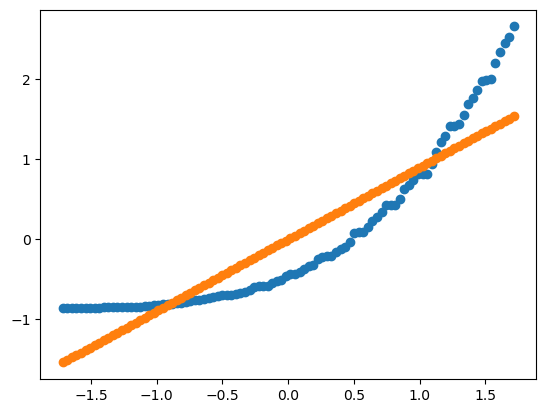

In [37]:
plt.scatter(globalCasesData['day'], globalCasesData['cases'])
plt.scatter(globalCasesData['day'], y)

In [42]:
print('Maximum residual error of linear model for MonkeyPox Cases data set', max_error(y_test, y_pred))

Maximum residual error of linear model for MonkeyPox Cases data set 0.8759774


In [43]:
print('coefficient of determination of linear model for MonkeyPox Cases data set', r2_score(y_test, y_pred))

coefficient of determination of linear model for MonkeyPox Cases data set 0.8183754783059509


In [45]:
print('Mean squared error of linear model for MonkeyPox Cases data set', mean_squared_error(y_test, y_pred))

Mean squared error of linear model for MonkeyPox Cases data set 0.19327849
